# Exploración de indicadores que reflejen la incidencia de Covid-19 en Venezuela usando fuentes de datos no oficiales.

# Google Trends API - pytrends 

___ 

Google Trends es un sitio web de Google que analiza la popularidad de los términos de búsqueda. Se pueden ver las palabras claves de tendencia, evaluar su popularidad en diferentes períodos de tiempo, explorar palabras claves relacionadas y mucho más.

Este notebook de Jupyter contiene todo el código utilizado para la extracción de los datos de Google Trends de las palabras claves que mostraremos más adelante. Se utiliza la siguiente biblioteca de Python para tal fin: [pytrends](https://pypi.org/project/pytrends/).
___

## Configuración

Configurar el entorno importando las bibliotecas con las que se van trabajar. Adicional a `pytrends`, se utilizará `pandas` que es una biblioteca de ciencia de datos y `matplotlib` y `seaborn` para la visualización de los datos. 

In [15]:
from pytrends.request import TrendReq 
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns

Definir el estilo de las gráficas utilizando los siguientes `seaborn`.

In [3]:
#tamaño
sns.set(rc={'figure.figsize':(11, 5)})
#fondo 
sns.set_style("white")

A continuación se define la función `consulta` que:

- Hace la conexión con Google `TrendReq()`

- Carga la solicitud `pytrend.build_payload()` 

- LLama al método `pytrend.interest_over_time()` que da el interés de la búsqueda a lo largo del tiempo.

- LLama al método `pytrend.related_queries()` que muestra detalladamente las búsquedas relacionadas a las palabras claves.

In [13]:
def consulta(kw_list, cat=0, timeframe='today 12-m', geo='VE'):
   
    """Conectar con google"""
    pytrend = TrendReq(hl='es-VE') 
    
    """Hacer la solicitud:
    kw_list = lista de palabras claves
    cat = categoría (todas las categorías (0))
    timeframe =  rango de tiempo
    geo = país (Abreviatura de dos letras del país (VE))
    """
    pytrend.build_payload(kw_list, cat, timeframe, geo) 
    
    """Interés a lo largo del tiempo"""
    iot_df = pytrend.interest_over_time()
    iot_df.reset_index().plot(x="date", y=kw_list, kind ="line", title="Tendencias", xlabel = "Fecha", ylabel = "Interés")
       
    
    """Búsquedas de temas relacionados""" 
    rq_df = pytrend.related_queries()
    
    print(rq_df)

## Recopilación y análisis de datos

___

Definamos nuestras **palabras claves** 

- oxígeno
- GoFundMe
- ayuda económica
- servicio público
- tratamiento covid-19
- dexametasona

Ya podemos empezar a extraer información por medio de las solicitudes. 

___

### Solicitud: oxígeno

Probemos con tilde y sin tilde para ver si hay diferencias entre los resultados. 

{'oxígeno': {'top':                           query  value
0         saturación de oxígeno    100
1       concentrador de oxígeno     25
2  saturación de oxígeno normal     20, 'rising':                           query   value
0         saturación de oxígeno  510850
1  saturación de oxígeno normal  101950}, 'oxigeno': {'top':                            query  value
0          saturacion de oxigeno    100
1        concentrador de oxigeno     63
2             bombona de oxigeno     48
3              ciclo del oxigeno     40
4           manometro de oxigeno     30
5   saturacion de oxigeno normal     26
6                tabla periodica     12
7     nivel de oxigeno en sangre     12
8           regulador de oxigeno      8
9           saturador de oxigeno      6
10         flujometro de oxigeno      4
11       propiedades del oxigeno      4
12                      oximetro      4, 'rising':                            query   value
0   saturacion de oxigeno normal  122700
1     nivel de oxig

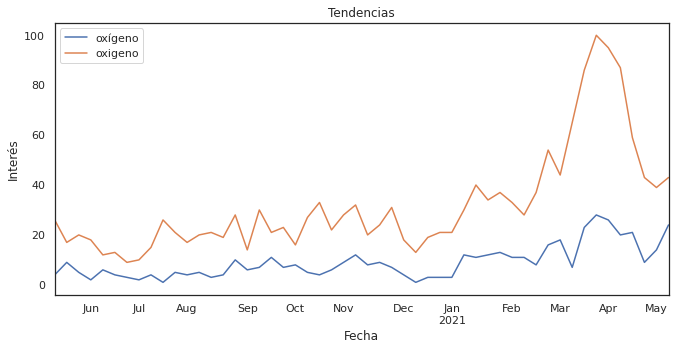

In [5]:
kw_list = ['oxígeno', 'oxigeno'] 
consulta(kw_list, cat=0,  timeframe='today 12-m', geo='VE')

## Interpretación de los resultados de nuestra primera solicitud

Estos resultados se dividen en dos partes: al principio encontramos un diccionario con las búsquedas relacionadas a las palabras claves, donde se les asocian valores en una escala del 0 al 100. El número 100 le corresponde a la tendencia más alta y a medida que va disminuyendo el número, va disminuyendo la tendencia. Finalmente, nos arroja una serie de tiempo que nos muestra el cambio de popularidad con el tiempo; los valores representan  el interés de búsqueda relativo al punto más alto en el gráfico, siendo 100 el pico de popularidad.

Tomemos como referencia "oxigeno", ya que tiene una búsqueda más significativa que "oxígeno". Las tendencias más altas de las consultas relacionadas a ella son "saturacion de oxigeno" (100), "concentrador de oxigeno" (74) y "bombona de oxigeno" (54). Adicionalmente, observamos cómo cambia su interés a lo largo del tiempo, teniendo un aumento exponencial de búsqueda entre marzo y mediados de abril, donde alcanza su punto máximo.  

<<<falta análisis<<<

Podemos interpretar analógamente las siguientes secciones que nos muestran las distintas solicitudes. 
___

### Solicitud: GoFundMe

{'GoFundMe': {'top':                 query  value
0  gofundme venezuela    100, 'rising':                 query  value
0  gofundme venezuela     90}}


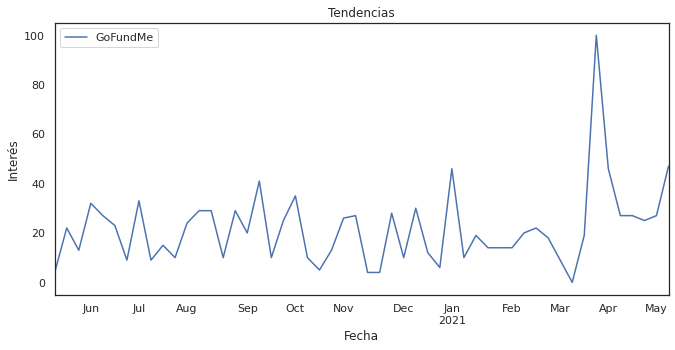

In [6]:
kw_list = ['GoFundMe']
consulta(kw_list, cat=0,  timeframe='today 12-m', geo='VE')

### Solicitud: ayuda económica

{'ayuda económica': {'top': None, 'rising': None}, 'ayuda economica': {'top': None, 'rising': None}}


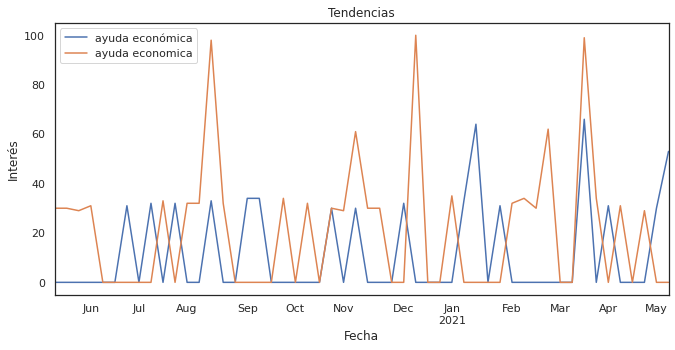

In [7]:
kw_list = ['ayuda económica', 'ayuda economica']
consulta(kw_list, cat=0,  timeframe='today 12-m', geo='VE')

### Solicitud: servicio público

{'servicio público': {'top': None, 'rising': None}, 'servicio publico': {'top': None, 'rising': None}}


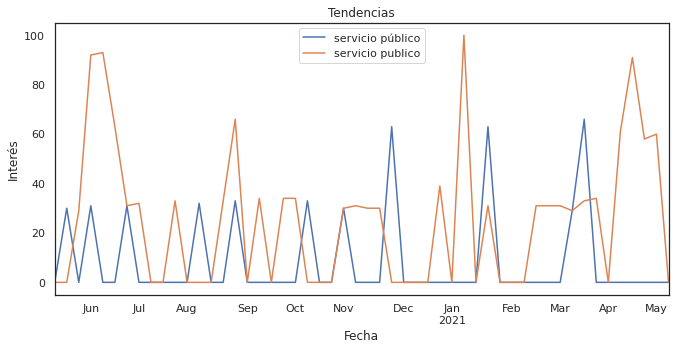

In [8]:
kw_list = ['servicio público', 'servicio publico']
consulta(kw_list, cat=0,  timeframe='today 12-m', geo='VE')

### Solicitud: tratamiento covid-19

{'tratamiento covid-19': {'top': None, 'rising': None}}


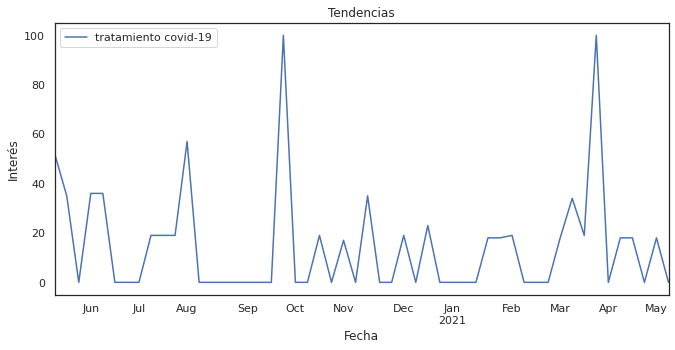

In [9]:
kw_list = ['tratamiento covid-19']
consulta(kw_list, cat=0,  timeframe='today 12-m', geo='VE')

### Solicitud: dexametasona

{'dexametasona': {'top':                                         query  value
0                 para que sirve dexametasona    100
1                   dexametasona para q sirve     95
2              para que sirve la dexametasona     40
3                        dexametasona ampolla     25
4              para que sirve el dexametasona     24
5                                betametasona     23
6                     dexametasona inyectable     18
7                      que es la dexametasona     16
8                para q sirve la dexametasona      9
9                       dexametasona tabletas      8
10                para que es la dexametasona      7
11         clotrimazol neomicina dexametasona      6
12                  betametasona para q sirve      5
13                                 prednisona      5
14     efectos secundarios de la dexametasona      4
15                   dexametasona para la tos      3
16                               dexametazona      3
17  para que sirve la

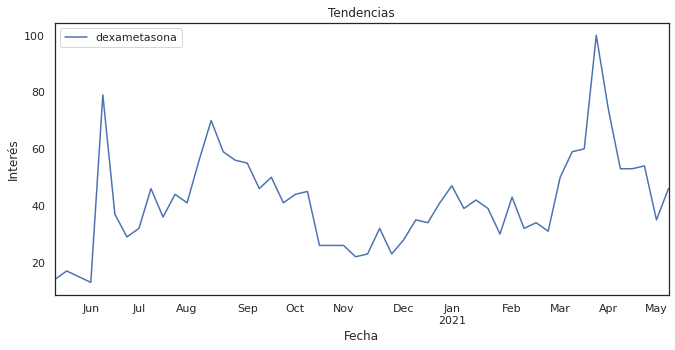

In [10]:
kw_list = ['dexametasona']
consulta(kw_list, cat=0,  timeframe='today 12-m', geo='VE')

### Comparación de los resultados

Visualicemos todas las búsquedas juntas. 

Text(0.5, 0, 'Fecha')

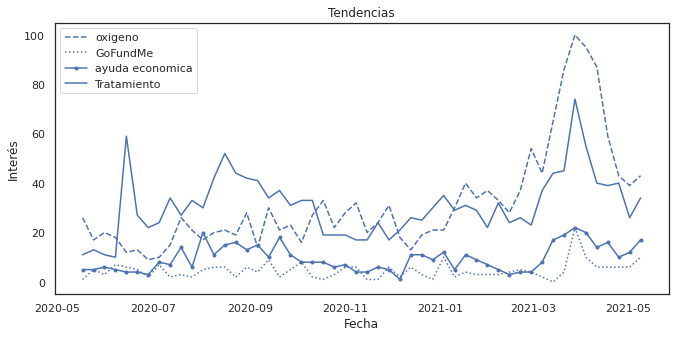

In [16]:
#pytrend = TrendReq(hl='es-VE') 
kw_list = ['oxigeno', 'GoFundMe', 'tratamiento covid', 'dexametasona']
pytrend.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='VE') 
df = pytrend.interest_over_time()

plt.figure()
plt.plot(df.index,df['oxigeno'],'b--')
plt.plot(df.index,df['GoFundMe'],'b:')
plt.plot(df.index,df['tratamiento covid'],'b.-')
plt.plot(df.index,df['dexametasona'],'b-')
plt.legend(['oxigeno','GoFundMe', 'ayuda economica', 'Tratamiento', 'dexametasona'])
plt.title("Tendencias")
plt.ylabel("Interés")
plt.xlabel("Fecha")

<<<Análisis<<<